In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim




def sine(amplitude, signal_period, signal_size):
    a = amplitude * np.sin(np.arange(signal_size) * (2 * np.pi / signal_period))
    return a



def triangle(amplitude, signal_period, signal_size):
    u_period = np.linspace(-amplitude, amplitude, signal_period)
    l_period = np.linspace(amplitude, -amplitude, signal_period)
    a = np.concatenate([u_period[1:], l_period[1:]] * int(signal_size/signal_period), 0)
    return a[:signal_size]



def tooth(amplitude, signal_period, signal_size):
    f_period = np.linspace(-amplitude, amplitude, signal_period)
    a = np.concatenate([f_period] * int(2 * signal_size/signal_period), 0)
    return a[:signal_size]





class RNN (nn.Module):
    def __init__(self,inputs,hidden,outputs):
        super(RNN,self).__init__()
        self.inputs=inputs
        self.hidden=hidden
        self.outputs=outputs
        self.active=nn.Tanh()
        
        self.input2hidden=nn.Linear(inputs,hidden)
        self.hidden2hidden=nn.Linear(hidden,hidden)
        self.hidden2output=nn.Linear(hidden,outputs)
        
            
    def forward (self,v,H):
        H = self.active(self.input2hidden(v) + self.hidden2hidden(H))
        out = self.active(self.hidden2output(H))
        
        return out


def train (X,Y,epoch,rate,NET,xx,si):
    X = X.float()
    Y = Y.float()
    
    criterion = nn.L1Loss() 
    optimizer = torch.optim.Adam(NET.parameters(),rate) 
    optimizer.zero_grad()
    loss_monit=np.zeros([2,epoch])
    
    H=torch.zeros(1,NET.hidden)
    for i in range(epoch):
        
        
        
        
        
        
        y = NET.forward(X,H)
        loss = criterion(y,Y)
        loss_monit[0,i] = i
        loss_monit[1,i] = loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() 
        
    xx = xx.float()
    u = NET.forward(xx,H)
    u = torch.reshape(u,(-1,))
    x_plt=torch.linspace(0,si,2*si)

    plt.show()
    plt.figure(0)
    plt.plot(x_plt.numpy(),xx.numpy())
    plt.title('noised signal')
    plt.figure(1)
    plt.plot(x_plt.numpy(),u.detach().numpy())
    
    weights1 = NET.input2hidden.weight.data
    weights2 = NET.hidden2output.weight.data
    
    return weights1,weights2,loss_monit[0,:],loss_monit[1,:]
    
    
    

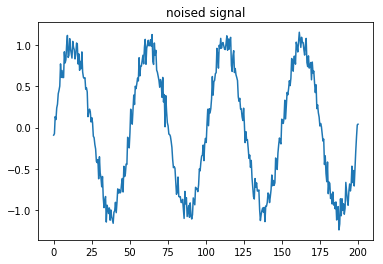

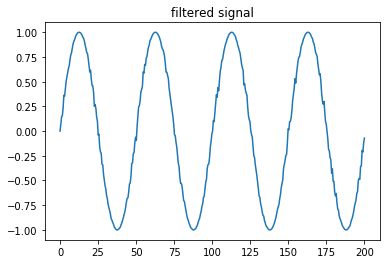

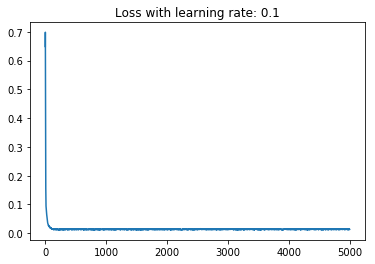

In [3]:
si=200



noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)

y1=torch.from_numpy(sine(1,100,si))
y2=torch.from_numpy(triangle(1,100,si))
y3=torch.from_numpy(tooth(1,100,si))

x1_n=y1+noise
x1_b=y1+brownian
x2_n=y2+noise
x2_b=y2+brownian
x3_n=y3+noise
x3_b=y3+brownian


X = torch.cat((x1_n,x1_b),0)
Y = torch.cat((y1,y1),0)

noise = np.random.normal(0, 0.1, size=2*si)
brownian = np.zeros(2*si)
brownian[0] = noise[0]
for i in range(1, 2*si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)

y4=torch.from_numpy(sine(1,100,400))
x4_n=y4+noise


denoise = RNN(2*si,20,2*si)
z,s,m,n=train (X,Y,5000,0.01,denoise,x4_n,si)



plt.figure(2)
plt.plot(m,n)
plt.title('Loss with learning rate: '+str(0.1)) 
plt.show()

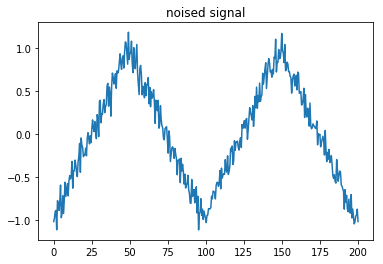

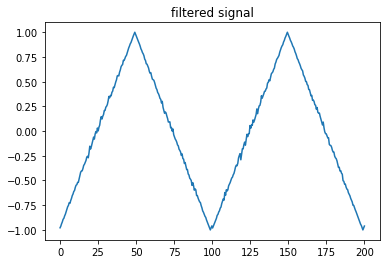

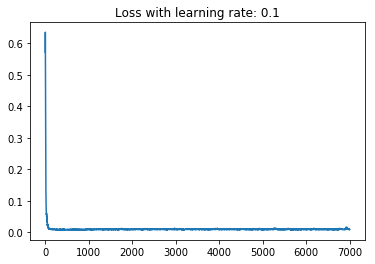

In [4]:
si=200



noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)

y1=torch.from_numpy(sine(1,100,si))
y2=torch.from_numpy(triangle(1,100,si))
y3=torch.from_numpy(tooth(1,100,si))

x1_n=y1+noise
x1_b=y1+brownian
x2_n=y2+noise
x2_b=y2+brownian
x3_n=y3+noise
x3_b=y3+brownian


X = torch.cat((x2_n,x2_b),0)
Y = torch.cat((y2,y2),0)

noise = np.random.normal(0, 0.1, size=2*si)
brownian = np.zeros(2*si)
brownian[0] = noise[0]
for i in range(1, 2*si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)

y4=torch.from_numpy(triangle(1,100,400))
x4_n=y4+noise


denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,x4_n,si)



plt.figure(2)
plt.plot(m,n)
plt.title('Loss with learning rate: '+str(0.1)) 
plt.show()

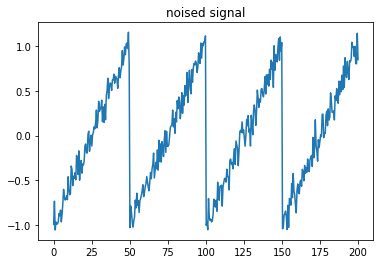

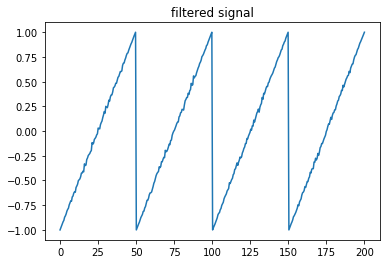

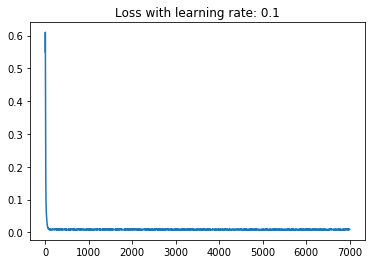

In [5]:
si=200



noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)

y1=torch.from_numpy(sine(1,100,si))
y2=torch.from_numpy(triangle(1,100,si))
y3=torch.from_numpy(tooth(1,100,si))

x1_n=y1+noise
x1_b=y1+brownian
x2_n=y2+noise
x2_b=y2+brownian
x3_n=y3+noise
x3_b=y3+brownian


X = torch.cat((x3_n,x3_b),0)
Y = torch.cat((y3,y3),0)

noise = np.random.normal(0, 0.1, size=2*si)
brownian = np.zeros(2*si)
brownian[0] = noise[0]
for i in range(1, 2*si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)

y4=torch.from_numpy(tooth(1,100,400))
x4_n=y4+noise


denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,x4_n,si)



plt.figure(2)
plt.plot(m,n)
plt.title('Loss with learning rate: '+str(0.1)) 
plt.show()

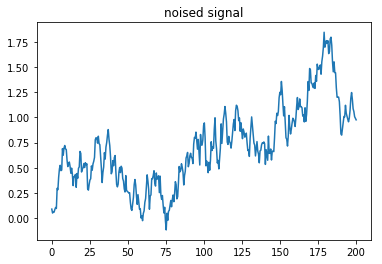

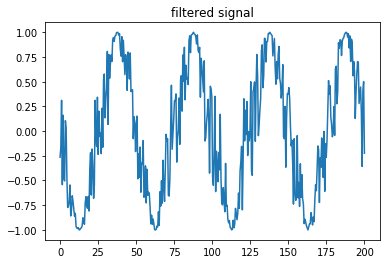

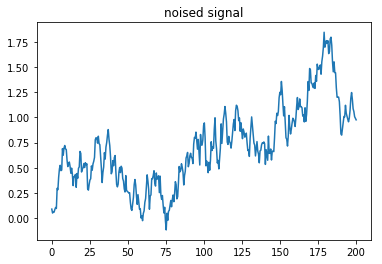

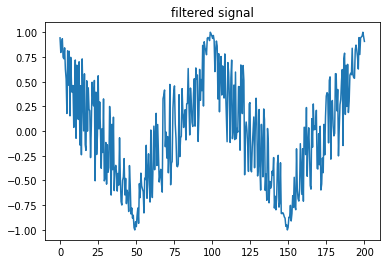

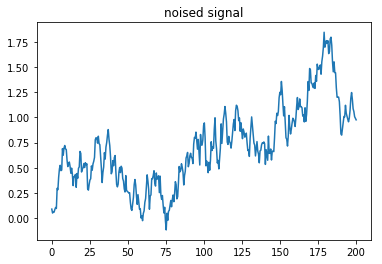

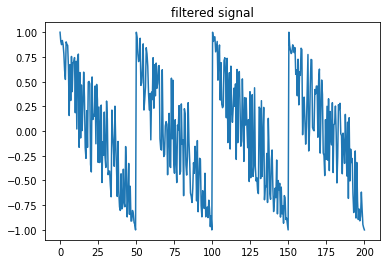

In [6]:
si=200



noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)

y1=torch.from_numpy(sine(1,100,si))
y2=torch.from_numpy(triangle(1,100,si))
y3=torch.from_numpy(tooth(1,100,si))

x1_n=y1+noise
x1_b=y1+brownian
x2_n=y2+noise
x2_b=y2+brownian
x3_n=y3+noise
x3_b=y3+brownian




noise = np.random.normal(0, 0.1, size=2*si)
brownian = np.zeros(2*si)
brownian[0] = noise[0]
for i in range(1, 2*si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)
x4_n=brownian

X = torch.cat((x1_n,x1_b),0)
Y = torch.cat((y1,y1),0)

denoise1 = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise1,x4_n,si)


X = torch.cat((x2_n,x2_b),0)
Y = torch.cat((y2,y2),0)

denoise2 = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise2,x4_n,si)



X = torch.cat((x3_n,x3_b),0)
Y = torch.cat((y3,y3),0)

denoise3 = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise3,x4_n,si)



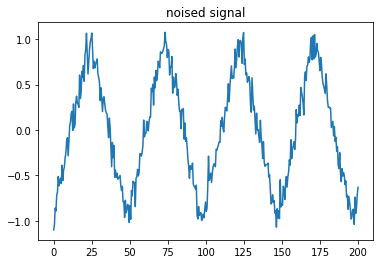

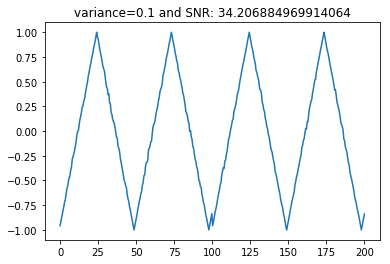

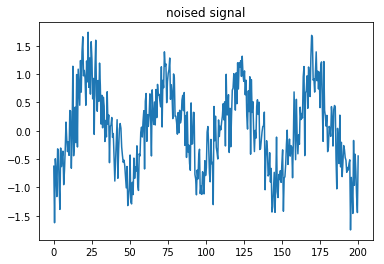

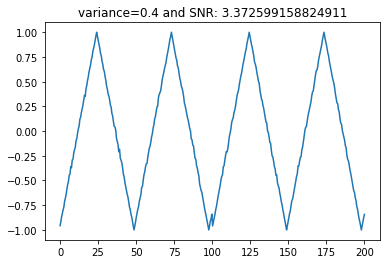

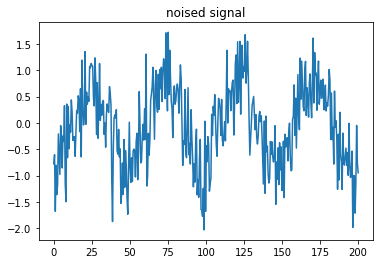

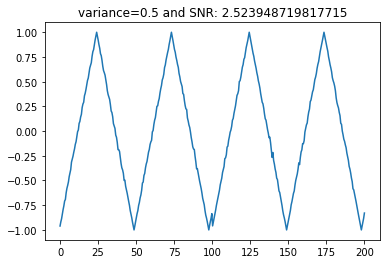

In [9]:
def snr(signal, target):
    #signal = signal[:, 0]
    signal=signal.data.numpy()
    target=target.data.numpy()
    noise = (signal - target)
    p1 = np.sum(signal*signal)
    p2 = np.sum(noise*noise)

    if p2 == 0:
        return 'infinity'
    return p1 / p2




si=200
noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)
y2=torch.from_numpy(triangle(1,50,si))
x2_n=y2+noise
x2_b=y2+brownian
X = torch.cat((x2_n,x2_b),0)
Y = torch.cat((y2,y2),0)
noise = np.random.normal(0, 0.1, size=2*si)
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,400))
x4_n=y4+noise
denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,x4_n,si)
plt.title('variance=0.1 and SNR: '+str(snr(x4_n,y4))) 
plt.show()

'''
noise = np.random.normal(0, 0.2, size=2*si)    
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,400))
x4_n=y4+noise
denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,x4_n,si)
plt.title('variance=0.2 and SNR: '+str(snr(x4_n,y4))) 
plt.show()


noise = np.random.normal(0, 0.3, size=2*si)    
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,400))
x4_n=y4+noise
denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,x4_n,si)
plt.title('variance=0.3 and SNR: '+str(snr(x4_n,y4))) 
plt.show()
'''

noise = np.random.normal(0, 0.4, size=2*si)    
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,400))
x4_n=y4+noise
denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,x4_n,si)
plt.title('variance=0.4 and SNR: '+str(snr(x4_n,y4))) 
plt.show()


noise = np.random.normal(0, 0.5, size=2*si)    
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,400))
x4_n=y4+noise
denoise = RNN(2*si,10,2*si)
z,s,m,n=train (X,Y,7000,0.01,denoise,x4_n,si)
plt.title('variance=0.5 and SNR: '+str(snr(x4_n,y4))) 
plt.show()

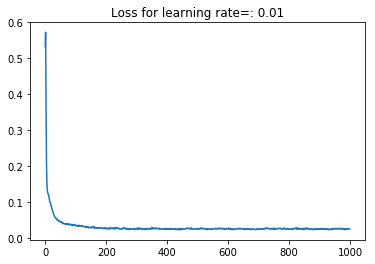

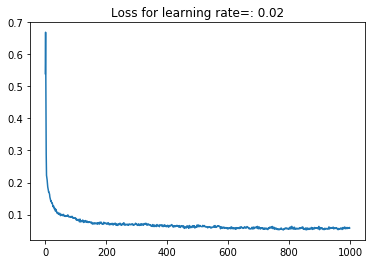

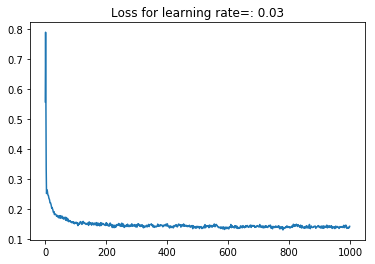

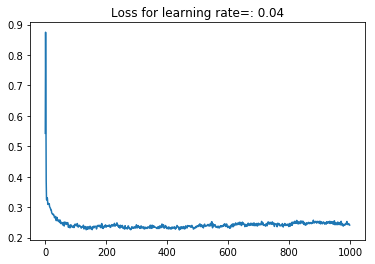

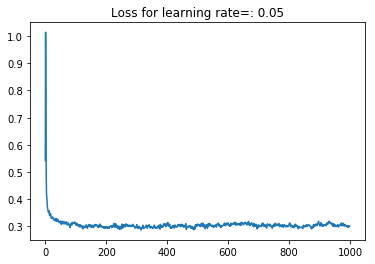

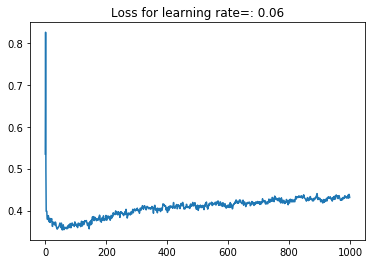

In [31]:
si=200

net1 = RNN(2*si,30,2*si)
net2 = RNN(2*si,30,2*si)
net3 = RNN(2*si,30,2*si)
net4 = RNN(2*si,30,2*si)
net5 = RNN(2*si,30,2*si)
net6 = RNN(2*si,30,2*si)




noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)
y2=torch.from_numpy(triangle(1,50,si))
x2_n=y2+noise
x2_b=y2+brownian
X = torch.cat((x2_n,x2_b),0)
Y = torch.cat((y2,y2),0)
noise = np.random.normal(0, 0.1, size=2*si)
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,400))
x4_n=y4+noise


z,s,m1,n1=train(X, Y, 1000,0.01,net1,x4_n,si)
z,s,m2,n2=train(X, Y, 1000,0.02,net2,x4_n,si)
z,s,m3,n3=train(X, Y, 1000,0.03,net3,x4_n,si)
z,s,m4,n4=train(X, Y, 1000,0.04,net4,x4_n,si)
z,s,m5,n5=train(X, Y, 1000,0.05,net5,x4_n,si)
z,s,m6,n6=train(X, Y, 1000,0.06,net6,x4_n,si)



plt.plot(m1,n1)
plt.title('Loss for learning rate=: '+str(0.01)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for learning rate=: '+str(0.02))
plt.show()



plt.plot(m3,n3)
plt.title('Loss for learning rate=: '+str(0.03))
plt.show()



plt.plot(m4,n4)
plt.title('Loss for learning rate=: '+str(0.04)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for learning rate=: '+str(0.05)) 
plt.show()


plt.plot(m6,n6)
plt.title('Loss for learning rate=: '+str(0.06)) 
plt.show()


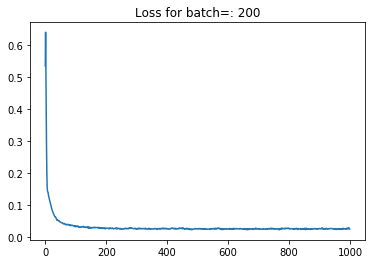

In [32]:
si=200

net1 = RNN(2*si,30,2*si)





noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)
y2=torch.from_numpy(triangle(1,50,si))
x2_n=y2+noise
x2_b=y2+brownian
X = torch.cat((x2_n,x2_b),0)
Y = torch.cat((y2,y2),0)
noise = np.random.normal(0, 0.1, size=2*si)
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,400))
x4_n=y4+noise


z,s,m1,n1=train(X, Y, 1000,0.01,net1,x4_n,si)




plt.plot(m1,n1)
plt.title('Loss for batch=: '+str(200)) 
plt.show()



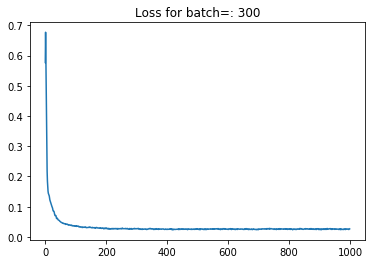

In [34]:
si=300

net1 = RNN(2*si,30,2*si)





noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)
y2=torch.from_numpy(triangle(1,50,si))
x2_n=y2+noise
x2_b=y2+brownian
X = torch.cat((x2_n,x2_b),0)
Y = torch.cat((y2,y2),0)
noise = np.random.normal(0, 0.1, size=2*si)
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,2*si))
x4_n=y4+noise


z,s,m1,n1=train(X, Y, 1000,0.01,net1,x4_n,si)




plt.plot(m1,n1)
plt.title('Loss for batch=: '+str(300)) 
plt.show()



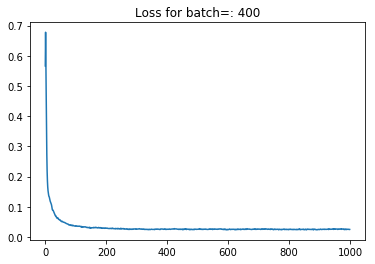

In [36]:
si=400

net1 = RNN(2*si,30,2*si)





noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)
y2=torch.from_numpy(triangle(1,50,si))
x2_n=y2+noise
x2_b=y2+brownian
X = torch.cat((x2_n,x2_b),0)
Y = torch.cat((y2,y2),0)
noise = np.random.normal(0, 0.1, size=2*si)
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,2*si))
x4_n=y4+noise


z,s,m1,n1=train(X, Y, 1000,0.01,net1,x4_n,si)




plt.plot(m1,n1)
plt.title('Loss for batch=: '+str(400)) 
plt.show()



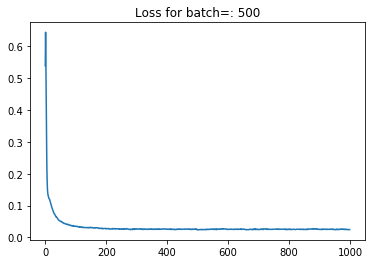

In [38]:
si=500

net1 = RNN(2*si,30,2*si)





noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)
y2=torch.from_numpy(triangle(1,50,si))
x2_n=y2+noise
x2_b=y2+brownian
X = torch.cat((x2_n,x2_b),0)
Y = torch.cat((y2,y2),0)
noise = np.random.normal(0, 0.1, size=2*si)
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,2*si))
x4_n=y4+noise


z,s,m1,n1=train(X, Y, 1000,0.01,net1,x4_n,si)




plt.plot(m1,n1)
plt.title('Loss for batch=: '+str(500)) 
plt.show()



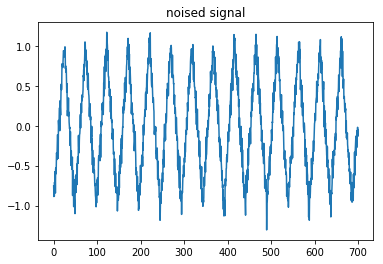

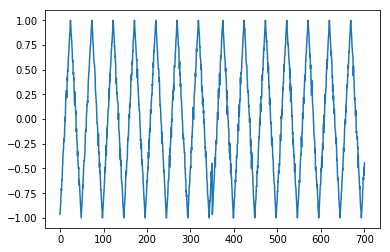

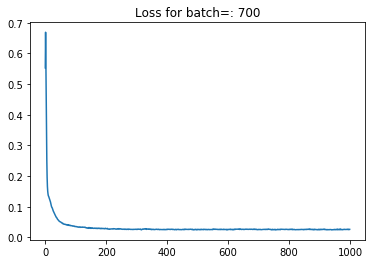

In [12]:
si=700

net1 = RNN(2*si,30,2*si)





noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)
y2=torch.from_numpy(triangle(1,50,si))
x2_n=y2+noise
x2_b=y2+brownian
X = torch.cat((x2_n,x2_b),0)
Y = torch.cat((y2,y2),0)
noise = np.random.normal(0, 0.1, size=2*si)
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,2*si))
x4_n=y4+noise


z,s,m1,n1=train(X, Y, 1000,0.01,net1,x4_n,si)


plt.figure(2)
plt.plot(m1,n1)
plt.title('Loss for batch=: '+str(700)) 
plt.show()



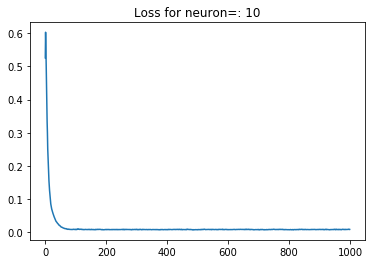

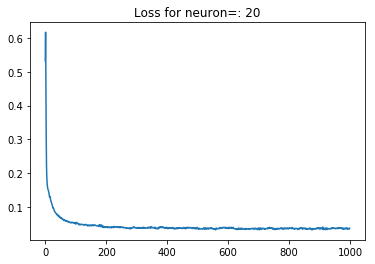

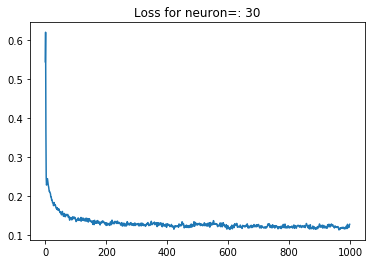

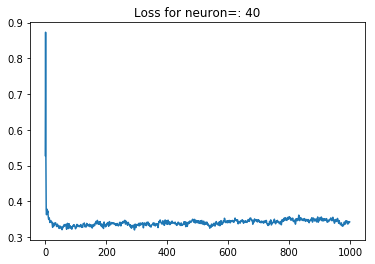

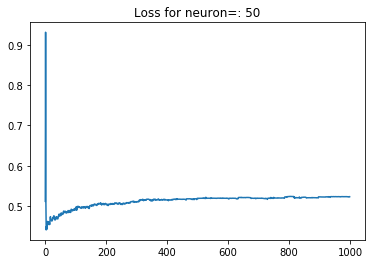

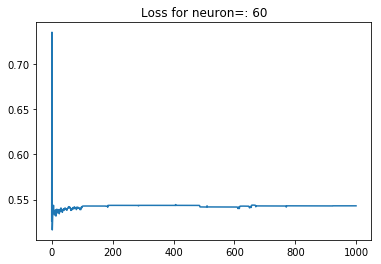

In [42]:
si=200

net1 = RNN(2*si,10,2*si)
net2 = RNN(2*si,20,2*si)
net3 = RNN(2*si,30,2*si)
net4 = RNN(2*si,40,2*si)
net5 = RNN(2*si,50,2*si)
net6 = RNN(2*si,60,2*si)




noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)
y2=torch.from_numpy(triangle(1,50,si))
x2_n=y2+noise
x2_b=y2+brownian
X = torch.cat((x2_n,x2_b),0)
Y = torch.cat((y2,y2),0)
noise = np.random.normal(0, 0.1, size=2*si)
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,400))
x4_n=y4+noise


z,s,m1,n1=train(X, Y, 1000,0.01,net1,x4_n,si)
z,s,m2,n2=train(X, Y, 1000,0.02,net2,x4_n,si)
z,s,m3,n3=train(X, Y, 1000,0.03,net3,x4_n,si)
z,s,m4,n4=train(X, Y, 1000,0.04,net4,x4_n,si)
z,s,m5,n5=train(X, Y, 1000,0.05,net5,x4_n,si)
z,s,m6,n6=train(X, Y, 1000,0.06,net6,x4_n,si)



plt.plot(m1,n1)
plt.title('Loss for neuron=: '+str(10)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for neuron=: '+str(20))
plt.show()



plt.plot(m3,n3)
plt.title('Loss for neuron=: '+str(30))
plt.show()



plt.plot(m4,n4)
plt.title('Loss for neuron=: '+str(40)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for neuron=: '+str(50))
plt.show()


plt.plot(m6,n6)
plt.title('Loss for neuron=: '+str(60)) 
plt.show()


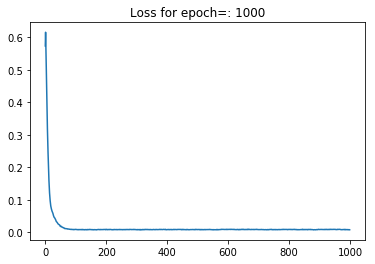

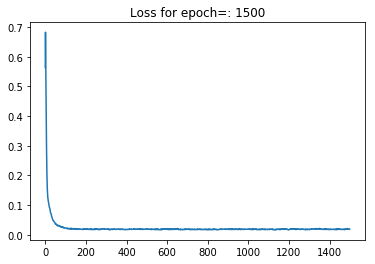

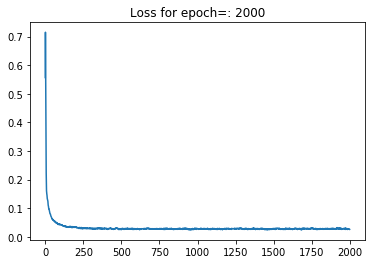

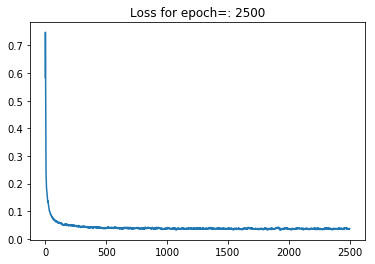

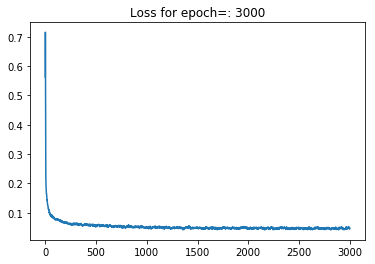

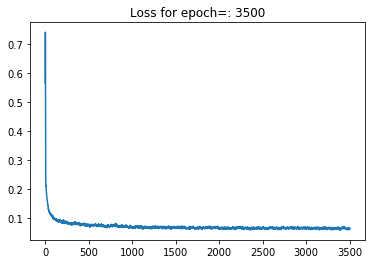

In [44]:
si=200

net1 = RNN(2*si,10,2*si)
net2 = RNN(2*si,10,2*si)
net3 = RNN(2*si,10,2*si)
net4 = RNN(2*si,10,2*si)
net5 = RNN(2*si,10,2*si)
net6 = RNN(2*si,10,2*si)




noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)
y2=torch.from_numpy(triangle(1,50,si))
x2_n=y2+noise
x2_b=y2+brownian
X = torch.cat((x2_n,x2_b),0)
Y = torch.cat((y2,y2),0)
noise = np.random.normal(0, 0.1, size=2*si)
noise=torch.from_numpy(noise)
y4=torch.from_numpy(triangle(1,50,400))
x4_n=y4+noise


z,s,m1,n1=train(X, Y, 1000,0.01,net1,x4_n,si)
z,s,m2,n2=train(X, Y, 1500,0.02,net2,x4_n,si)
z,s,m3,n3=train(X, Y, 2000,0.03,net3,x4_n,si)
z,s,m4,n4=train(X, Y, 2500,0.04,net4,x4_n,si)
z,s,m5,n5=train(X, Y, 3000,0.05,net5,x4_n,si)
z,s,m6,n6=train(X, Y, 3500,0.06,net6,x4_n,si)



plt.plot(m1,n1)
plt.title('Loss for epoch=: '+str(1000)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for epoch=: '+str(1500)) 
plt.show()



plt.plot(m3,n3)
plt.title('Loss for epoch=: '+str(2000)) 
plt.show()



plt.plot(m4,n4)
plt.title('Loss for epoch=: '+str(2500)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for epoch=: '+str(3000)) 
plt.show()


plt.plot(m6,n6)
plt.title('Loss for epoch=: '+str(3500))  
plt.show()


Text(0.5,1,'hidden to output')

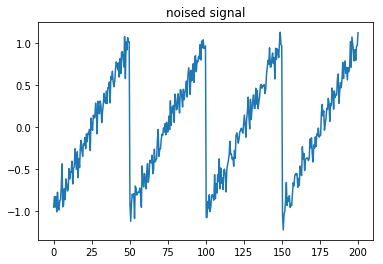

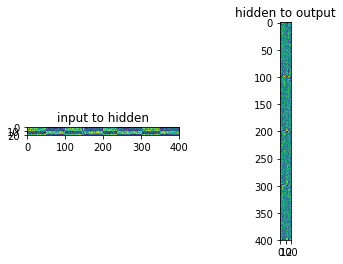

In [13]:
si=200



noise = np.random.normal(0, 0.1, size=si)
brownian = np.zeros(si)
brownian[0] = noise[0]
for i in range(1, si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)

y1=torch.from_numpy(sine(1,100,si))
y2=torch.from_numpy(triangle(1,100,si))
y3=torch.from_numpy(tooth(1,100,si))

x1_n=y1+noise
x1_b=y1+brownian
x2_n=y2+noise
x2_b=y2+brownian
x3_n=y3+noise
x3_b=y3+brownian


X = torch.cat((x3_n,x3_b),0)
Y = torch.cat((y3,y3),0)

noise = np.random.normal(0, 0.1, size=2*si)
brownian = np.zeros(2*si)
brownian[0] = noise[0]
for i in range(1, 2*si):
    
            
        
    brownian[i] = noise[i] + brownian[i-1]
    
    
noise=torch.from_numpy(noise)
brownian=torch.from_numpy(brownian)

y4=torch.from_numpy(tooth(1,100,400))
x4_n=y4+noise


denoise = RNN(2*si,20,2*si)
z,s,m,n=train (X,Y,4000,0.01,denoise,x4_n,si)


plt.subplot(1,2,1)
plt.imshow(z)
plt.title('input to hidden')
    
plt.subplot(1,2,2)
plt.imshow(s)
plt.title('hidden to output')
